In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('C:/0/interview/ESPN_take_home/ESPN_take_home/app_reviews.csv')
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
df_info= pd.read_csv('C:/0/interview/ESPN_take_home/ESPN_take_home/app_info.csv')
df_info.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Q1.EDA
1) Most Sentiment Polarity of reviews is around 0.
2) Most Sentiment Subjectivity of reviews is around 0.5.

count    37432.000000
mean         0.182146
std          0.351301
min         -1.000000
25%          0.000000
50%          0.150000
75%          0.400000
max          1.000000
Name: Sentiment_Polarity, dtype: float64


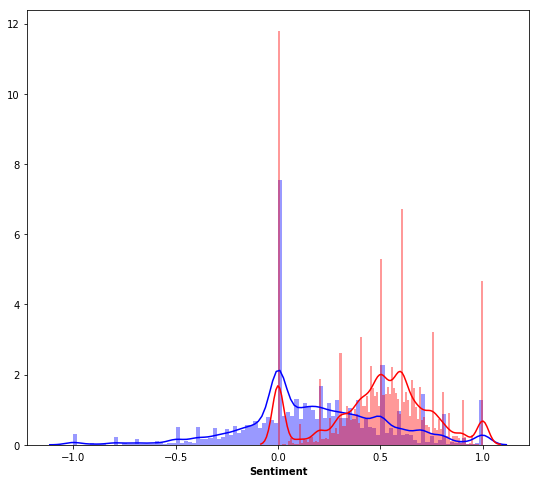

In [6]:
print(df['Sentiment_Polarity'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Sentiment_Polarity'], color='b', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(df['Sentiment_Subjectivity'], color='r', bins=100, hist_kws={'alpha': 0.4}).set_xlabel('Sentiment', fontweight='bold');

Q1.EDA
3) Most ratings are between 4 to 5.

Text(0.5, 0, 'Rating')

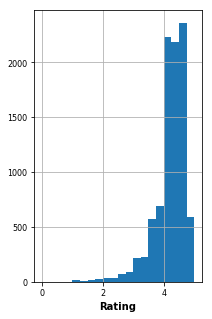

In [7]:
df_num = df_info[df_info['Rating'] != 19]
df_num['Rating'].hist(figsize=(3, 5), bins=20,range=[0, 5], xlabelsize=8, ylabelsize=8).set_xlabel('Rating', fontweight='bold')

Q1.EDA
4) Around 7000 Apps have Reviews less than 200000, and around 2000 Apps have more than 175000 reviews.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


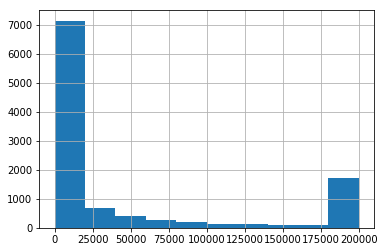

In [13]:
df_num.info() 
df_num['Reviews'].astype(str).astype(int).clip(upper=200000).hist()

In [14]:
import sqlite3
conn = sqlite3.connect('TestDB1.db')
c = conn.cursor()
df.to_sql('Reviews', conn, if_exists='replace', index = False) 

In [16]:
###Q2
df_stm = pd.read_sql_query('''
select c.APP, c.Sentiment, c.Count, d.Total, (c.Count*100.0/d.Total) as "Percentage" from
(Select APP, Sentiment, count(*) as "Count"
From (select * from Reviews where Sentiment IS NOT NULL)
Group By Sentiment, APP
order by APP) c left join 

(Select APP,  count(*) as "Total"
From (select * from Reviews where Sentiment IS NOT NULL)
Group By APP
order by APP) d

on c.APP = d.APP;''', conn)

Q2. Percentages are shown as below.

In [17]:
df_stmt = df_stm.pivot(index ='APP', columns ='Sentiment', values =['Percentage']) 
df_stmt

Percentage             \
Sentiment                                            Negative    Neutral   
APP                                                                        
10 Best Foods for You                                5.154639  11.340206   
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                     2.500000  20.000000   
11st                                                17.500000  25.000000   
1800 Contacts - Lens Store                           7.500000  12.500000   
1LINE – One Line with One Touch                     21.052632   7.894737   
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif     3.125000  18.750000   
21-Day Meditation Experience                        12.500000   2.500000   
2Date Dating App, Love and matching                 18.421053  13.157895   
2GIS: directory & navigator                         15.000000  27.500000   
2RedBeans                                            5.128205  15.384615   
2ndLine - Second Phone Number                       17.500000  40.000000   
30 Day Fitness Challenge - Workout at Home           6.451613   6.451613   
365Scores - Live Scores                                   NaN  28.571429   
3D Live Neon Weed Launcher                                NaN        NaN   
4 in a Row                                          15.000000        NaN   
4K Wallpapers and Ultra HD Backgrounds              22.222222        NaN   
591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢  13.333333  53.333333   
591房屋交易-香港                                          11.111111  33.333333   
7 Cups: Anxiety & Stress Chat                       12.500000        NaN   
7 Day Food Journal Challenge                              NaN        NaN   
7 Minute Workout                                     9.090909        NaN   
7 Weeks - Habit & Goal Tracker                      28.571429        NaN   
8 Ball Pool                                         48.401826   4.109589   
850 Sports News Digest                               2.564103        NaN   
8fit Workouts & Meal Planner                        11.111111   8.771930   
95Live -SG#1 Live Streaming App                     25.641026  30.769231   
A Call From Santa Claus!                            41.176471        NaN   
A Word A Day                                              NaN  25.000000   
A&E - Watch Full Episodes of TV Shows                7.894737  13.157895   
A+ Gallery - Photos & Videos                        17.073171  24.390244   
...                                                       ...        ...   
HipChat - Chat Built for Teams                      39.393939  31.818182   
Hipmunk Hotels & Flights                             2.857143  11.428571   
Hitwe - meet people and chat                        77.777778        NaN   
Hole19: Golf GPS App, Rangefinder & Scorecard             NaN   5.263158   
Home Decor Showpiece Art making: Medium Difficulty  20.000000  16.000000   
Home Scouting® MLS Mobile                           37.500000  21.875000   
Home Security Camera WardenCam - reuse old phones   15.384615  15.384615   
Home Street – Home Design Game                      22.807018   3.508772   
Home Workout - No Equipment                          3.846154   3.846154   
Home Workout for Men - Bodybuilding                       NaN  15.384615   
Home workouts - fat burning, abs, legs, arms,chest        NaN        NaN   
HomeWork                                                  NaN        NaN   
Homes.com 🏠 For Sale, Rent                          14.285714  33.333333   
Homescapes                                          48.076923        NaN   
Homesnap Real Estate & Rentals                      17.142857  11.428571   
Homestyler Interior Design & Decorating Ideas       20.588235  23.529412   
Homework Planner                                    10.810811        NaN   
Honkai Impact 3rd                                   28.947368        NaN   
Hopper - Watch & Book Flights                       23.684211   5.263158   
Horoscopes – Daily Zodi

Q2. Visulization are shown as below.

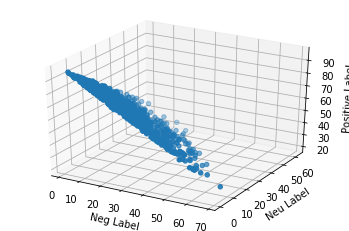

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

###df.index, df['H-L'], df['Close']

###df1 = df.dropna()
ax.scatter(df_stmt.iloc[:, 0]  , df_stmt.iloc[:, 1], df_stmt.iloc[:, 2], marker='o')

ax.set_xlabel('Neg Label')
ax.set_ylabel('Neu Label')
ax.set_zlabel('Positive Label')

plt.show()

In [19]:
df_num.to_sql('info', conn, if_exists='replace', index = False) 

C:\Users\86753\Anaconda3\lib\site-packages\pandas\core\generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


Q3. Top 10 applications which have the most installs

In [23]:
###Q3
c.execute('''  
select APP, Rating,  CAST(REPLACE(substr(Installs,1, length(Installs)-1),",","") as Int) as "Installs" from info
order by CAST(REPLACE(substr(Installs,1, length(Installs)-1),",","") as Int)   desc
LIMIT 10
''')

for row in c.fetchall():
    print (row)

('Google Play Books', 3.9, 1000000000)
('Messenger – Text and Video Chat for Free', 4.0, 1000000000)
('WhatsApp Messenger', 4.4, 1000000000)
('Google Chrome: Fast & Secure', 4.3, 1000000000)
('Gmail', 4.3, 1000000000)
('Hangouts', 4.0, 1000000000)
('WhatsApp Messenger', 4.4, 1000000000)
('Messenger – Text and Video Chat for Free', 4.0, 1000000000)
('Hangouts', 4.0, 1000000000)
('Skype - free IM & video calls', 4.1, 1000000000)


In [24]:
df_Re = pd.read_sql_query('''
select APP, Rating, Reviews, CAST(REPLACE(substr(Installs,1, length(Installs)-1),",","") as Int)  as "Installs", Category from info
order by CAST(REPLACE(substr(Installs,1, length(Installs)-1),",","") as Int)  desc
''', conn)
df_Re1 = df_Re.dropna()

In [25]:
df_Re2 = pd.read_sql_query('''
select info.APP, Rating, Reviews, CAST(REPLACE(substr(Installs,1, length(Installs)-1),",","") as Int)  as "Installs",Reviews.Sentiment,Reviews.Sentiment_Polarity  from info
left join Reviews on info.APP = Reviews.APP
''', conn)
df_Re3 = df_Re2.dropna()

Q4. Trend would be Apps with high ratings. Correlation between Installs and Rating is highest.
    Correlations are shown below:(Here could be improved by normalizing/scaling the data)

In [26]:
###Q4
from scipy.stats import spearmanr
corr, _ = spearmanr(df_Re1.iloc[:,3], df_Re1.iloc[:,1])
print('Spearmans correlation between Installs and Rating: %.3f' % corr)

from scipy.stats import spearmanr
corr, _ = spearmanr(df_Re1.iloc[:,3], df_Re1.iloc[:,2])
print('Spearmans correlation between Installs and Reviews: %.3f' % corr)

from scipy.stats import spearmanr
corr, _ = spearmanr(df_Re3.iloc[:,3], df_Re3.iloc[:,5])
print('Spearmans correlation between Installs and Sentiment Polarity: %.3f' % corr)

Spearmans correlation between Installs and Rating: 0.070
Spearmans correlation between Installs and Reviews: 0.039
Spearmans correlation between Installs and Sentiment Polarity: -0.158


C:\Users\86753\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [28]:
groups = df_Re1.groupby(['Category']).Rating
min_val = groups.transform(min)
max_val = groups.transform(max)

Q5. Top rated application name and its’ rating for each category.

In [37]:
##Q5
df_Re1[(df_Re1.Rating==max_val)].sort_values('Category').iloc[:,[4,0,1]]

,Category,App,Rating
9887,ART_AND_DESIGN,Spring flowers theme couleurs d t space,5.0
2840,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,4.9
4971,AUTO_AND_VEHICLES,Tickets SDA 2018 and Exam from the State Traff...,4.9
4975,AUTO_AND_VEHICLES,CDL Practice Test 2018 Edition,4.9
4977,AUTO_AND_VEHICLES,DMV Permit Practice Test 2018 Edition,4.9
8224,AUTO_AND_VEHICLES,MHD F-Series,4.9
2849,BEAUTY,"ipsy: Makeup, Beauty, and Tips",4.9
9164,BOOKS_AND_REFERENCE,Catholic La Bu Zo Kam,5.0
10132,BOOKS_AND_REFERENCE,BC MVA Fines,5.0
8372,BOOKS_AND_REFERENCE,Tozer Devotional -Series 1,5.0
